# ANALISIS BIVARIADO CATEGORICO

In [2]:
#importando librerias 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from libraries import *

In [3]:
data = pd.read_csv("./dataset_discretizado.csv")

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9734 entries, 0 to 9733
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Unnamed: 0              9734 non-null   int64 
 1   SOCIO                   9734 non-null   object
 2   CUENTA                  9734 non-null   int64 
 3   AGENCIA                 9734 non-null   int64 
 4   TIPO_SOCIO              9734 non-null   int64 
 5   MONEDA                  9734 non-null   object
 6   PAGARE                  9734 non-null   object
 7   PRODUCTO                9734 non-null   object
 8   FEC_ULT_PAGO            9734 non-null   object
 9   DIAS                    9734 non-null   int64 
 10  NOM_FRECUENCIA          9734 non-null   object
 11  ESTADO_CIVIL            9734 non-null   object
 12  SEXO                    9734 non-null   object
 13  TIPO_VIVIENDA           9734 non-null   object
 14  OTORGA                  9734 non-null   object
 15  RIES

In [5]:
lista = ordenar(set(data['TEA_INTERES'].unique()))
type(lista)

list

## ANALISIS RESPECTO AL RIESGO

<Axes: xlabel='RIESGO_INDIVIDUAL', ylabel='TEA_INTERES'>

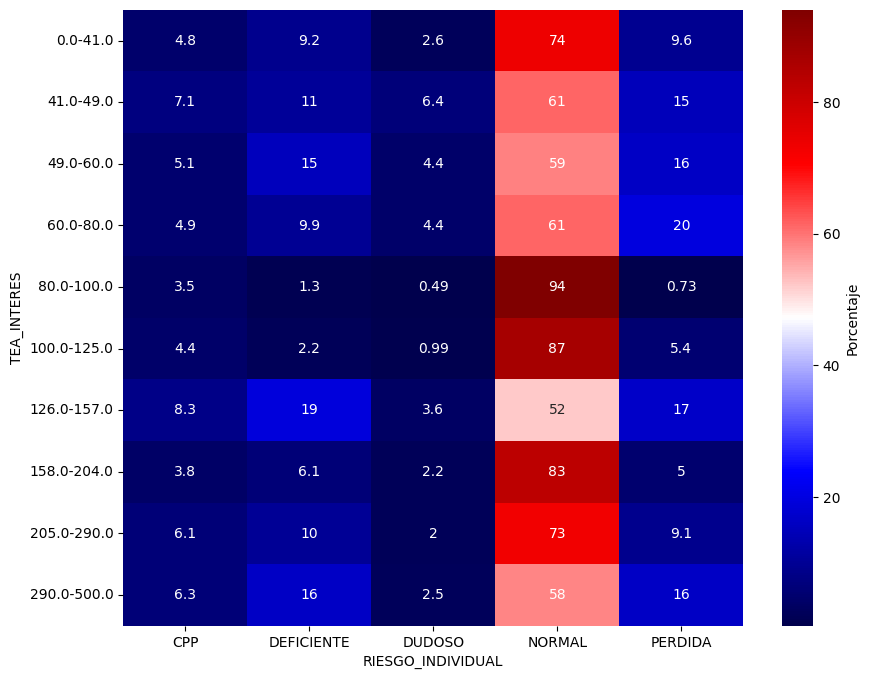

In [6]:
TeaxMorosidad = 100 * pd.crosstab(data['TEA_INTERES'], data['RIESGO_INDIVIDUAL'], normalize='index')
TeaxMorosidad = TeaxMorosidad.reindex(ordenar(TeaxMorosidad.index))
plt.figure(figsize=(10, 8))
sns.heatmap(TeaxMorosidad, annot=True, cmap='seismic', cbar_kws={'label': 'Porcentaje'})

<Axes: xlabel='RIESGO_INDIVIDUAL', ylabel='CUOTA_FIJA'>

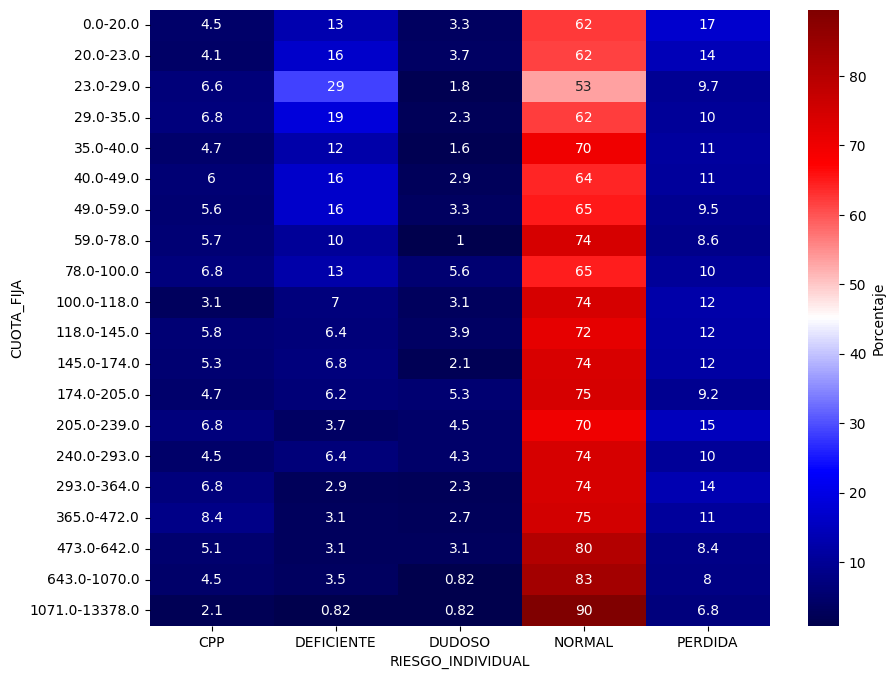

In [7]:
CuoFijaxMorosidad = 100*pd.crosstab(data['CUOTA_FIJA'], data['RIESGO_INDIVIDUAL'], normalize='index').sort_index(ascending=True)
CuoFijaxMorosidad = CuoFijaxMorosidad.reindex(ordenar(CuoFijaxMorosidad.index))
plt.figure(figsize=(10, 8))
sns.heatmap(CuoFijaxMorosidad, annot=True, cmap='seismic', cbar_kws={'label': 'Porcentaje'})

In [8]:
pd.crosstab(data['EDAD'], data['RIESGO_INDIVIDUAL'])

RIESGO_INDIVIDUAL,CPP,DEFICIENTE,DUDOSO,NORMAL,PERDIDA
EDAD,,,,,
18-25,63,101,41,630,90
25-35,144,283,84,1880,323
35-45,154,293,87,2018,358
45-55,113,163,39,1436,193
55-65,41,84,30,761,85
65+,10,23,3,183,21


<Axes: xlabel='RIESGO_INDIVIDUAL', ylabel='EDAD'>

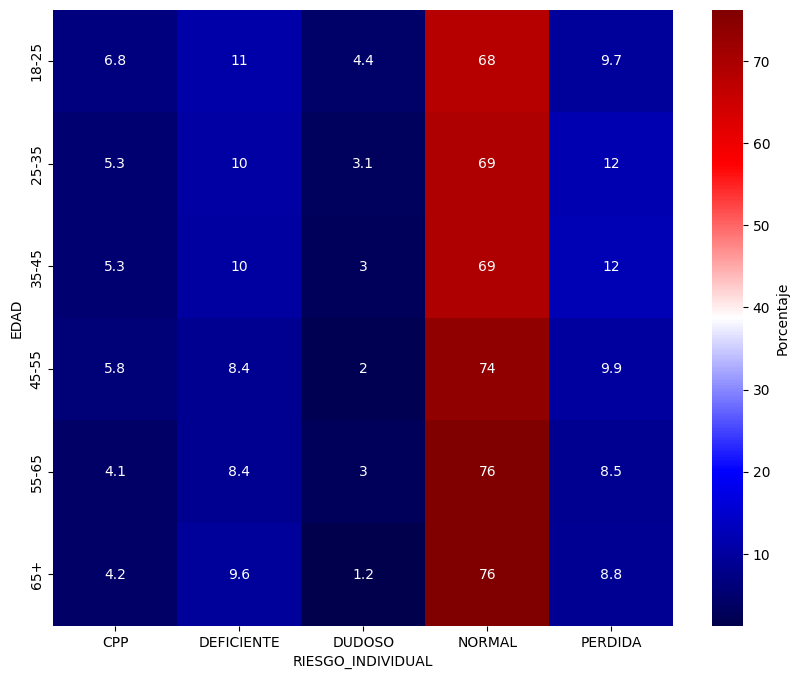

In [9]:
MorosidadxEdad = 100*pd.crosstab(data['EDAD'], data['RIESGO_INDIVIDUAL'], normalize='index')
plt.figure(figsize=(10, 8))
sns.heatmap(MorosidadxEdad, annot=True, cmap='seismic', cbar_kws={'label': 'Porcentaje'})

## ANALISIS DE LA DISTRIBUCION DEL DATASET

### RESPECTO AL GENERO

C:\Users\LAPTOP\AppData\Local\Temp\ipykernel_15268\929392563.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  x.set_xticklabels(x.get_xticklabels(), rotation=90);


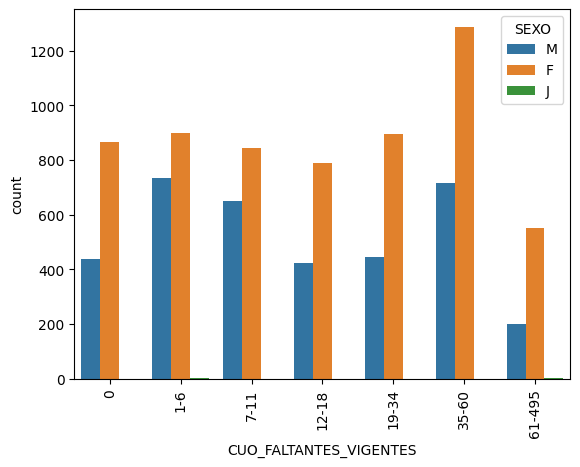

In [10]:
x = sns.countplot(data, x="CUO_FALTANTES_VIGENTES", hue="SEXO", dodge=True, order = ordenar(list(set(data['CUO_FALTANTES_VIGENTES'].unique()))))
x.set_xticklabels(x.get_xticklabels(), rotation=90);

C:\Users\LAPTOP\AppData\Local\Temp\ipykernel_15268\359375000.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  x.set_xticklabels(x.get_xticklabels(), rotation=90);


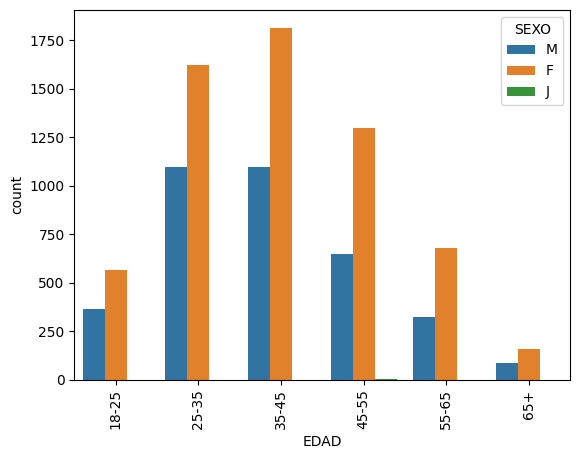

In [11]:
x = sns.countplot(data, x="EDAD", hue="SEXO", dodge=True,order=sorted(data['EDAD']))
x.set_xticklabels(x.get_xticklabels(), rotation=90);

C:\Users\LAPTOP\AppData\Local\Temp\ipykernel_15268\4252773097.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  x.set_xticklabels(x.get_xticklabels(), rotation=90);


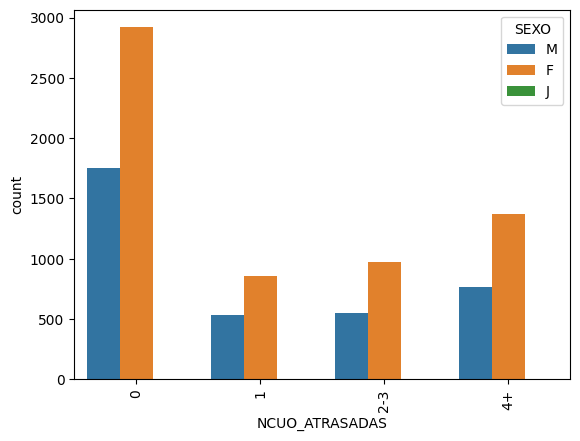

In [12]:
x = sns.countplot(data, x="NCUO_ATRASADAS", hue="SEXO", dodge=True,order=sorted(data['NCUO_ATRASADAS']))
x.set_xticklabels(x.get_xticklabels(), rotation=90);

C:\Users\LAPTOP\AppData\Local\Temp\ipykernel_15268\1858678919.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  x.set_xticklabels(x.get_xticklabels(), rotation=90);


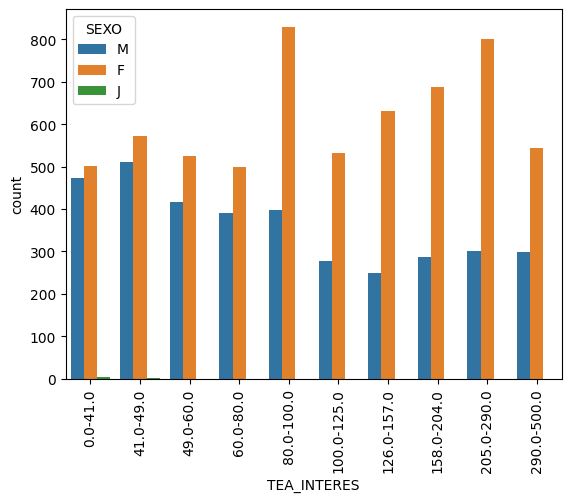

In [13]:
x = sns.countplot(data, x="TEA_INTERES", hue="SEXO", dodge=True, order = ordenar(list(set(data['TEA_INTERES'].unique()))))
x.set_xticklabels(x.get_xticklabels(), rotation=90);

### RESPECTO AL ESTADO CIVIL

C:\Users\LAPTOP\AppData\Local\Temp\ipykernel_15268\3112439623.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(


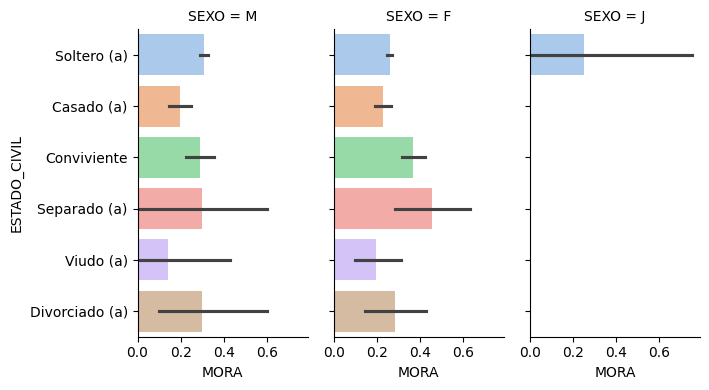

In [14]:
sns.catplot(
    data, x="MORA", y="ESTADO_CIVIL", col="SEXO",
    kind="bar", height=4, aspect=.6, palette="pastel",
)

### RESPECTO A LA FRECUENCIA DE PAGO

C:\Users\LAPTOP\AppData\Local\Temp\ipykernel_15268\2145927868.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  x.set_xticklabels(x.get_xticklabels(), rotation=90);


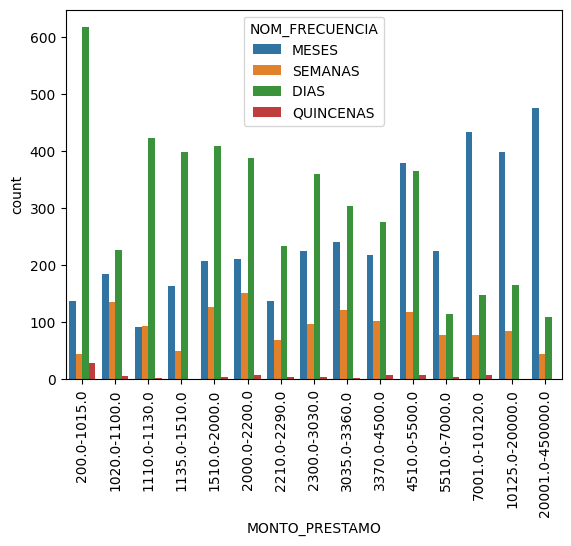

In [15]:
x = sns.countplot(data, x="MONTO_PRESTAMO", hue="NOM_FRECUENCIA", dodge=True, order = ordenar(list(set(data['MONTO_PRESTAMO'].unique()))))
x.set_xticklabels(x.get_xticklabels(), rotation=90);

C:\Users\LAPTOP\AppData\Local\Temp\ipykernel_15268\545230418.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  x.set_xticklabels(x.get_xticklabels(), rotation=90);


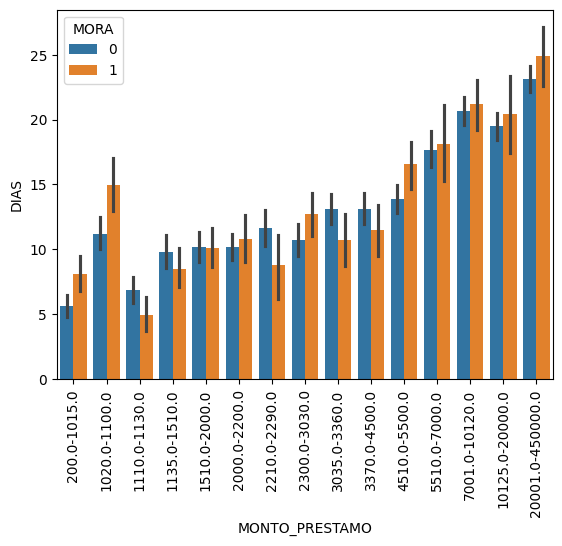

In [16]:
x = sns.barplot(data, x='MONTO_PRESTAMO', y='DIAS', hue='MORA', order = ordenar(list(set(data['MONTO_PRESTAMO'].unique()))));
x.set_xticklabels(x.get_xticklabels(), rotation=90);

C:\Users\LAPTOP\AppData\Local\Temp\ipykernel_15268\3567511028.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  x.set_xticklabels(x.get_xticklabels(), rotation=90);


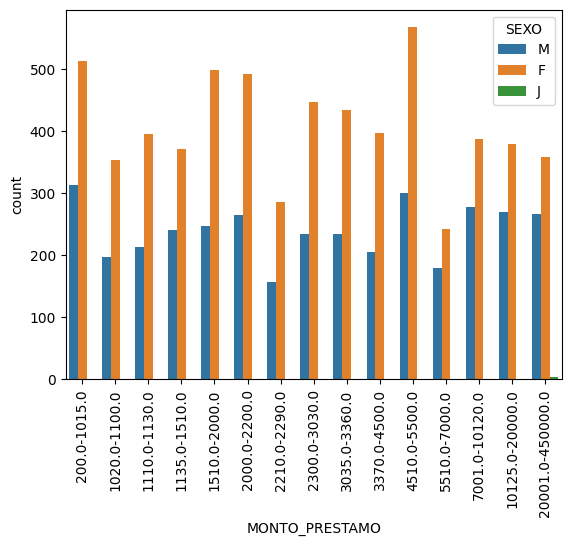

In [17]:
x = sns.countplot(data, x="MONTO_PRESTAMO", hue="SEXO", dodge=True, order=ordenar(list(set(data['MONTO_PRESTAMO'].unique()))))
x.set_xticklabels(x.get_xticklabels(), rotation=90);

C:\Users\LAPTOP\AppData\Local\Temp\ipykernel_15268\224728154.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  x.set_xticklabels(x.get_xticklabels(), rotation=90);


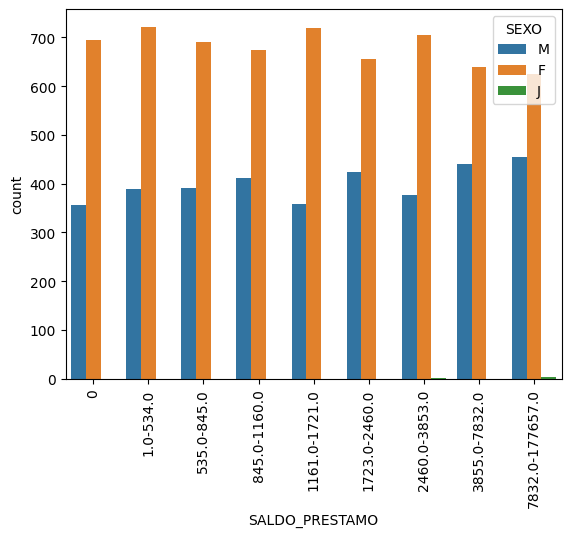

In [18]:
x = sns.countplot(data, x="SALDO_PRESTAMO", hue="SEXO", dodge=True, order=ordenar(list(set(data['SALDO_PRESTAMO'].unique()))))
x.set_xticklabels(x.get_xticklabels(), rotation=90);

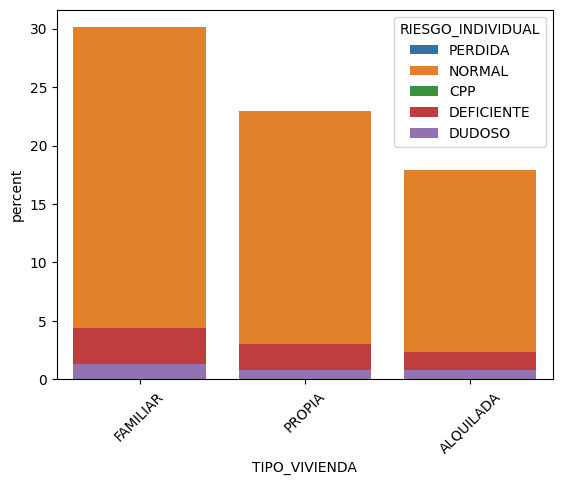

In [22]:
ax=sns.countplot(data, x='TIPO_VIVIENDA', hue='RIESGO_INDIVIDUAL', stat='percent',dodge=False)
ax.tick_params(axis='x', rotation=45);

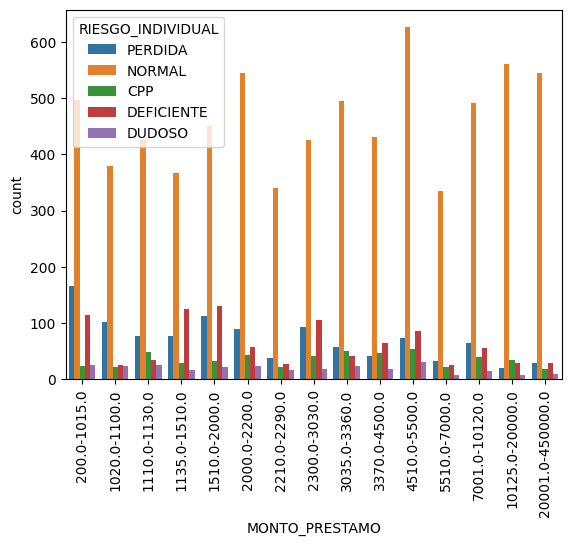

In [37]:
ax=sns.countplot(data, x='MONTO_PRESTAMO', hue='RIESGO_INDIVIDUAL', stat='count',dodge=True,order=ordenar(list(set(data['MONTO_PRESTAMO'].unique()))))
ax.tick_params(axis='x', rotation=90);

In [30]:
tab_pctj_prestamo = 100*pd.crosstab(data['MONTO_PRESTAMO'], data['RIESGO_INDIVIDUAL'], normalize='index')
tab_pctj_prestamo = tab_pctj_prestamo.reindex(ordenar(tab_pctj_prestamo.index))
tab_pctj_prestamo

RIESGO_INDIVIDUAL,CPP,DEFICIENTE,DUDOSO,NORMAL,PERDIDA
MONTO_PRESTAMO,,,,,
200.0-1015.0,2.781137,13.905683,3.143894,60.096735,20.072551
1020.0-1100.0,3.811252,4.718693,4.355717,68.784029,18.330309
1110.0-1130.0,8.032787,5.573770,4.262295,69.672131,12.459016
1135.0-1510.0,4.575163,20.261438,2.614379,59.967320,12.581699
1510.0-2000.0,4.289544,17.426273,2.949062,60.321716,15.013405
2000.0-2200.0,5.680317,7.661823,3.038309,71.862616,11.756935
2210.0-2290.0,4.966140,6.094808,3.611738,76.749436,8.577878
2300.0-3030.0,6.149341,15.373353,2.781845,62.225476,13.469985
3035.0-3360.0,7.634731,6.137725,3.592814,73.952096,8.682635


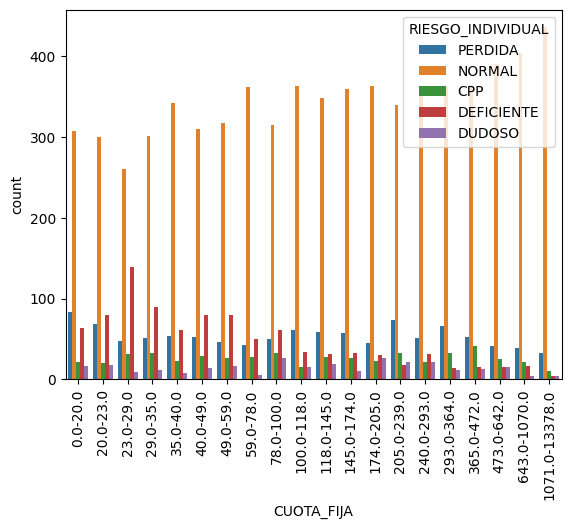

In [39]:
ax=sns.countplot(data, x='CUOTA_FIJA', hue='RIESGO_INDIVIDUAL', stat='count',dodge=True,order=ordenar(list(set(data['CUOTA_FIJA'].unique()))))
ax.tick_params(axis='x', rotation=90);

In [38]:
tab_pctj_CuotaF = 100*pd.crosstab(data['CUOTA_FIJA'], data['RIESGO_INDIVIDUAL'], normalize='index')
tab_pctj_CuotaF = tab_pctj_CuotaF.reindex(ordenar(tab_pctj_CuotaF.index))
tab_pctj_CuotaF

RIESGO_INDIVIDUAL,CPP,DEFICIENTE,DUDOSO,NORMAL,PERDIDA
CUOTA_FIJA,,,,,
0.0-20.0,4.471545,13.008130,3.252033,62.398374,16.869919
20.0-23.0,4.115226,16.460905,3.703704,61.728395,13.991770
23.0-29.0,6.570842,28.542094,1.848049,53.388090,9.650924
29.0-35.0,6.790123,18.518519,2.263374,61.934156,10.493827
35.0-40.0,4.713115,12.500000,1.639344,70.081967,11.065574
40.0-49.0,5.979381,16.494845,2.886598,63.917526,10.721649
49.0-59.0,5.555556,16.460905,3.292181,65.226337,9.465021
59.0-78.0,5.749487,10.266940,1.026694,74.332649,8.624230
78.0-100.0,6.790123,12.551440,5.555556,64.814815,10.288066
